In [1]:
import jax
import jax.numpy as jnp
from jax.experimental import optimizers
import os
import h5py
import numpy as onp
import time
import cardiax
import deepx
from deepx import optimise
import helx
from helx.types import Optimiser
import json
import wandb
import pickle
import IPython
from IPython.display import display
from IPython.display import display_javascript
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.animation as animation
import helx
from matplotlib import rc
from functools import partial
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import matplotlib.patches as mpatches

rc('animation', html='jshtml')
rc('text', usetex=False)


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# rc['animation.embed_limit'] = 2**128
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

## Setup parameters

## Generate sequences

In [10]:
shape = (1200, 1200)
reshape = (256, 256)

state = cardiax.solve.init(shape)
start = 0
step = 5000
dt = 0.01
dx = 0.01
paramset = cardiax.params.PARAMSET_3

p1 = cardiax.stimulus.Protocol(0, 2, 1e9)
s1 = [cardiax.stimulus.linear(shape, cardiax.stimulus.Direction.SOUTH, 0.2, 20.0, p1)]
p2 = cardiax.stimulus.Protocol(40000, 2, 1e9)
s2 = [cardiax.stimulus.linear(shape, cardiax.stimulus.Direction.EAST, 0.2, 20.0, p2)]
stimuli = s1 + s2


seed = 12
rng = jax.random.PRNGKey(seed)
diffusivity = deepx.generate.random_diffusivity(rng, shape)
stop = 250_000
filename = "data/cardiax_{}.hdf5".format(seed)

if not os.path.exists(filename):
    deepx.generate.sequence(
        start, stop, step, dt, dx, paramset, diffusivity, stimuli, filename, reshape=reshape, use_memory=True, plot_while=True
    )

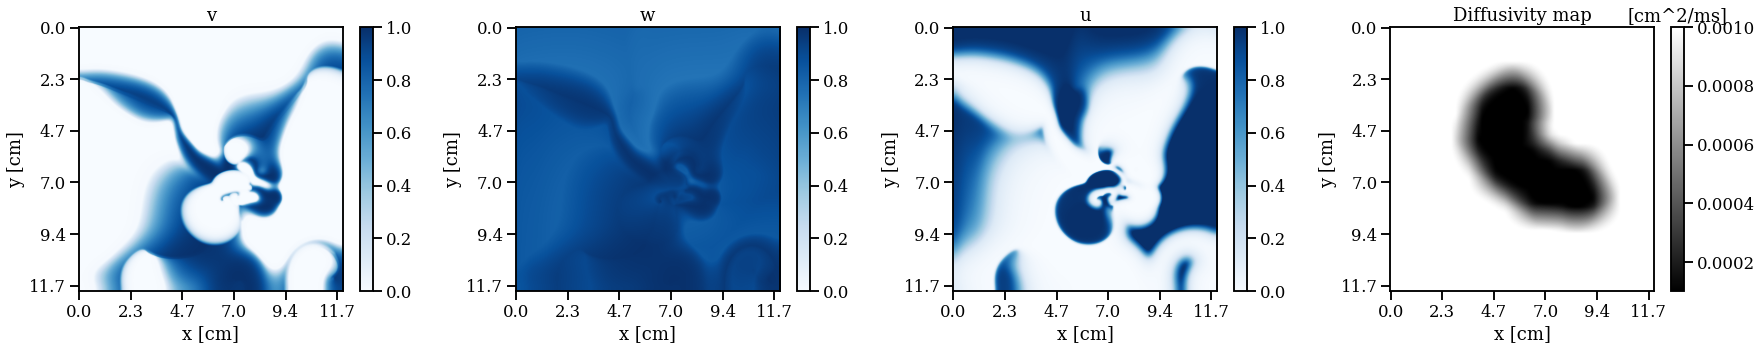

In [45]:
with h5py.File("data/cardiax_{}.hdf5".format(seed), "r") as f:
    states = f["states"]
    d = f["diffusivity"]
    idx = 30
    state = cardiax.solve.State(*states[24])
    with sns.plotting_context("talk"):
        fig, ax = cardiax.plot.plot_state(state, d, cmap="Blues", dx=12/256, figsize=(25, 5))
        fig.tight_layout()
        os.makedirs("results/cardiax", exist_ok=True)
        fig.savefig("results/cardiax/{}.svg".format(seed))
        fig.savefig("results/cardiax/{}.png".format(seed))

In [46]:
shape = (1200, 1200)
reshape = (256, 256)

state = cardiax.solve.init(shape)
start = 0
step = 5000
dt = 0.01
dx = 0.01
paramset = cardiax.params.PARAMSET_5

p1 = cardiax.stimulus.Protocol(0, 2, 1e9)
s1 = [cardiax.stimulus.linear(shape, cardiax.stimulus.Direction.WEST, 0.2, 20.0, p1)]
p2 = cardiax.stimulus.Protocol(40000, 2, 1e9)
s2 = [cardiax.stimulus.linear(shape, cardiax.stimulus.Direction.NORTH, 0.2, 20.0, p2)]
stimuli = s1 + s2

seed = 31
rng = jax.random.PRNGKey(seed)
diffusivity = deepx.generate.random_diffusivity(rng, shape)
stop = 100_000
filename = "data/cardiax_{}.hdf5".format(seed)

if not os.path.exists(filename):
    deepx.generate.sequence(
        start, stop, step, dt, dx, paramset, diffusivity, stimuli, filename, reshape=reshape, use_memory=True, plot_while=True
    )

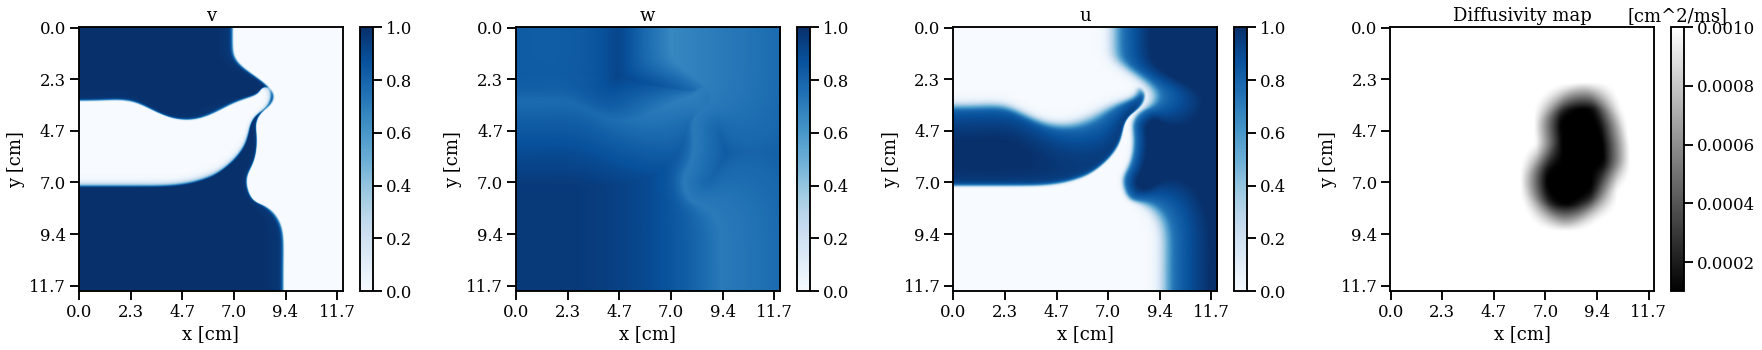

In [47]:
with h5py.File("data/cardiax_{}.hdf5".format(seed), "r") as f:
    states = f["states"]
    d = f["diffusivity"]
    idx = 10
    state = cardiax.solve.State(*states[idx])
    with sns.plotting_context("talk"):
        fig, ax = cardiax.plot.plot_state(state, d, cmap="Blues", dx=12/256, figsize=(25, 5))
        fig.tight_layout()
        os.makedirs("results/cardiax", exist_ok=True)
        fig.savefig("results/cardiax/{}.svg".format(seed))
        fig.savefig("results/cardiax/{}.png".format(seed))

Tissue size is: (12, 12) - Computing on grid (1200, 1200)
Checkpointing every 5000 steps
Cell parameters Params(tau_v_plus=3.33, tau_v1_minus=12, tau_v2_minus=2, tau_w_plus=1000, tau_w_minus=100, tau_d=0.362, tau_0=5, tau_r=33.33, tau_si=29, k=15, V_csi=0.7, V_c=0.13, V_v=0.04, Cm=1)


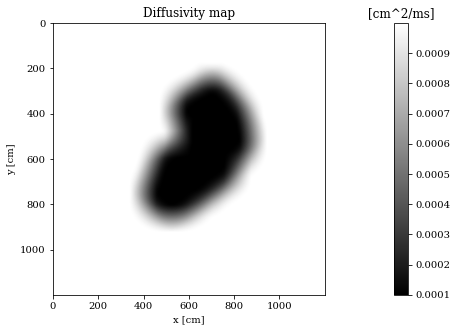

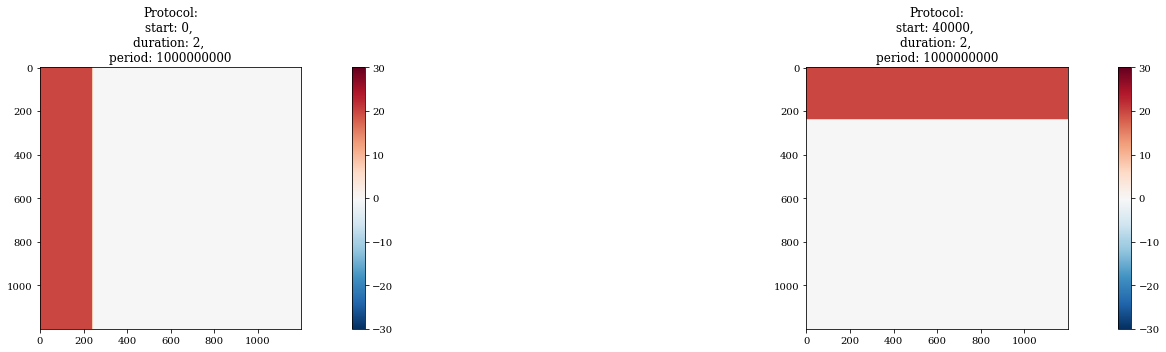

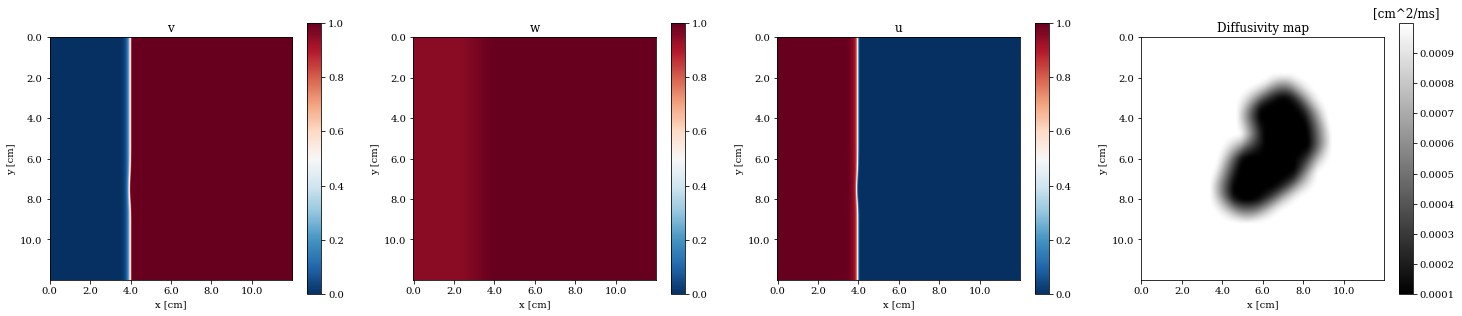

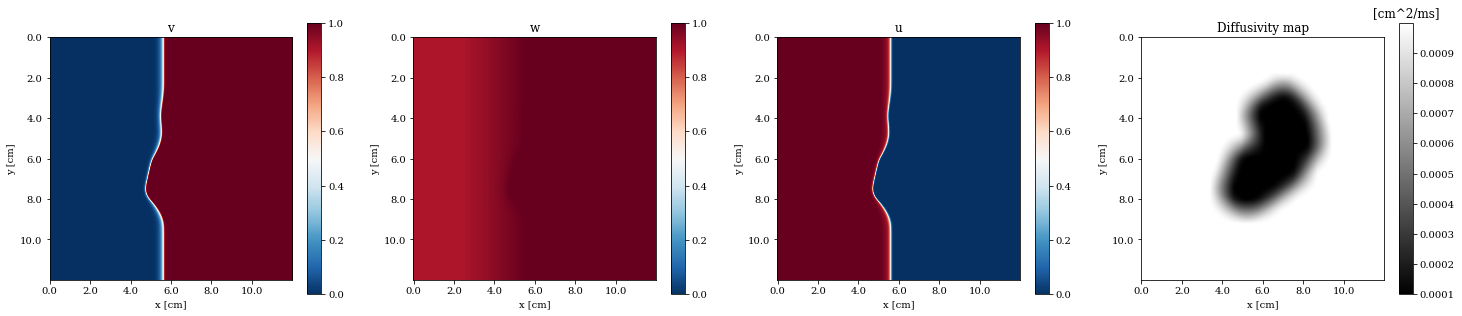

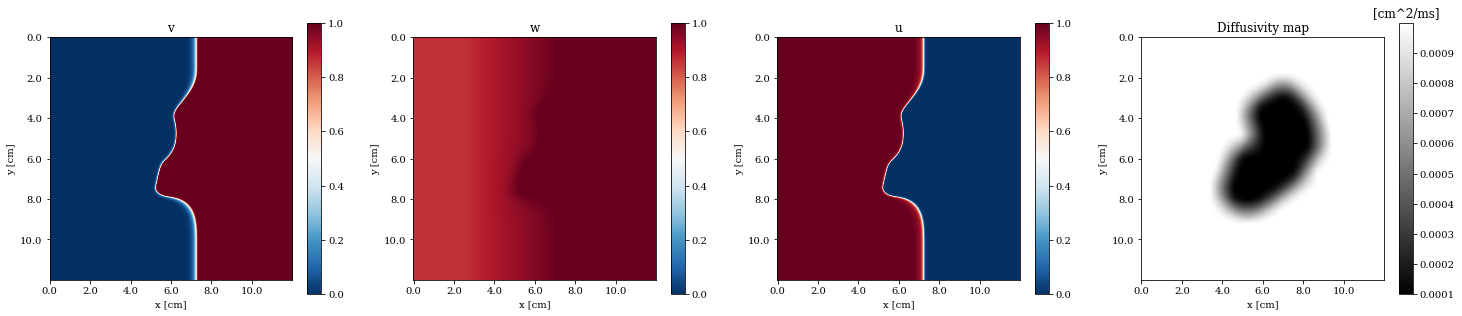

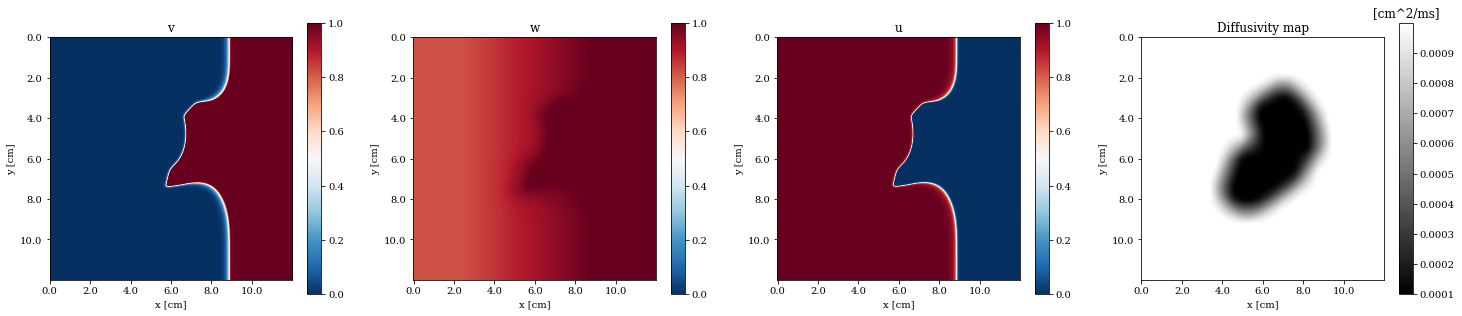

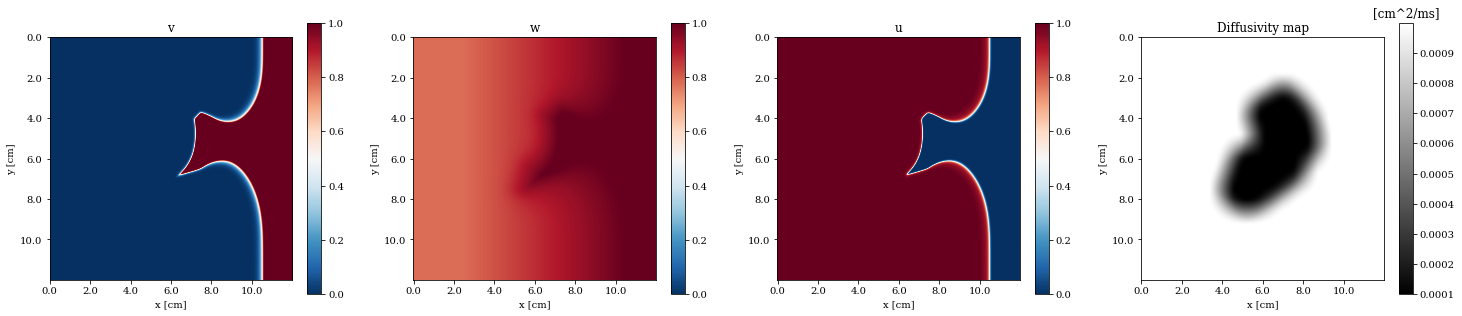

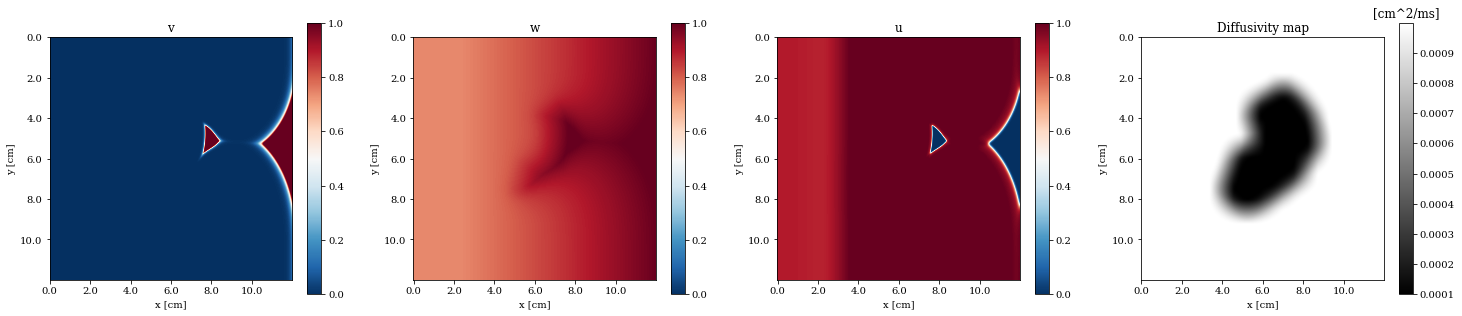

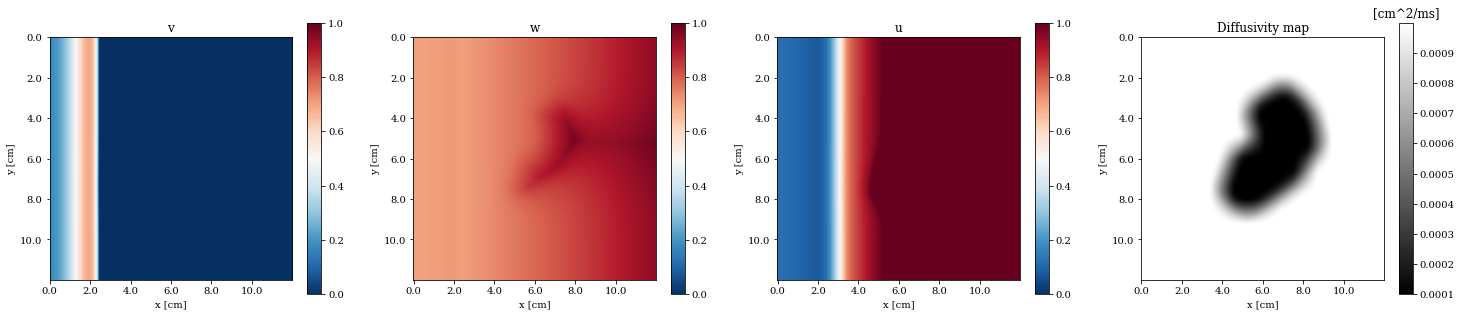

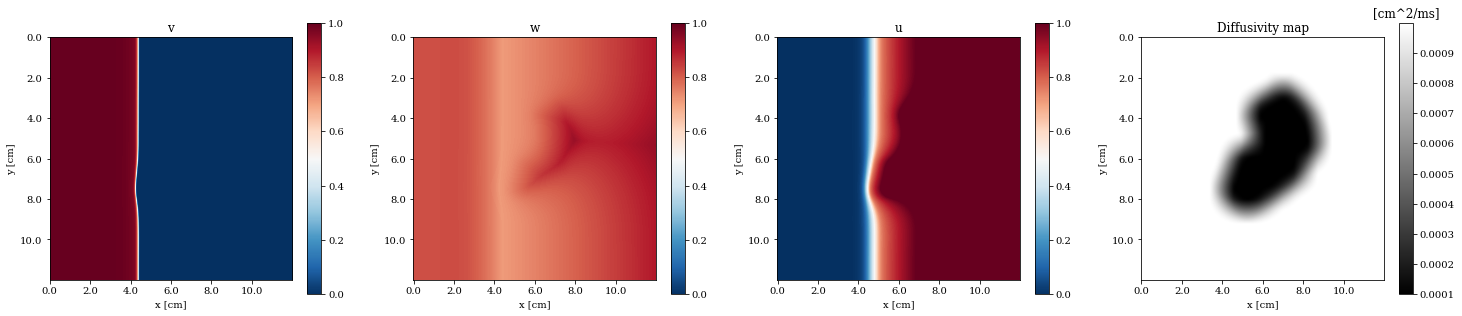

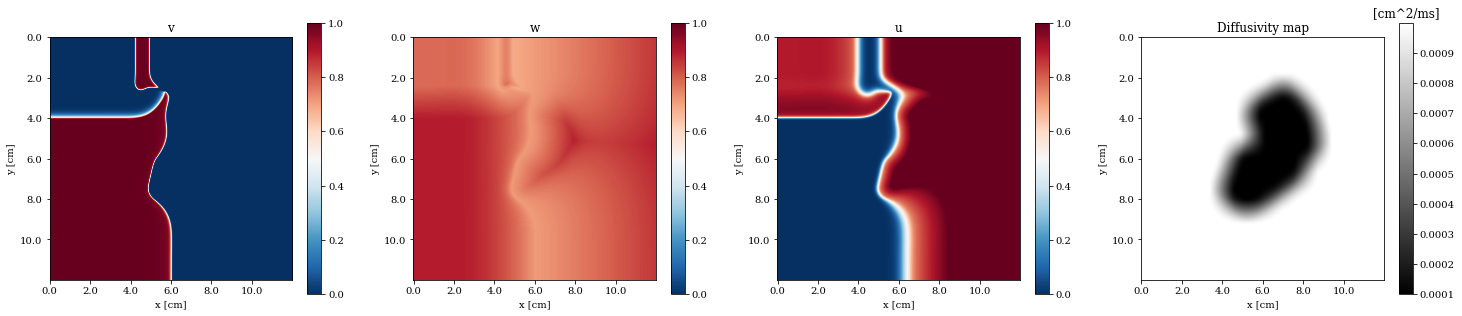

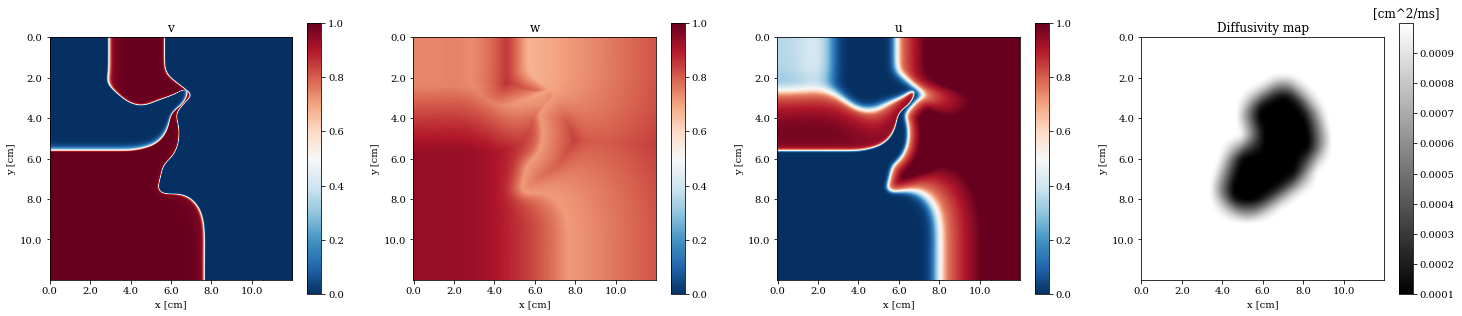

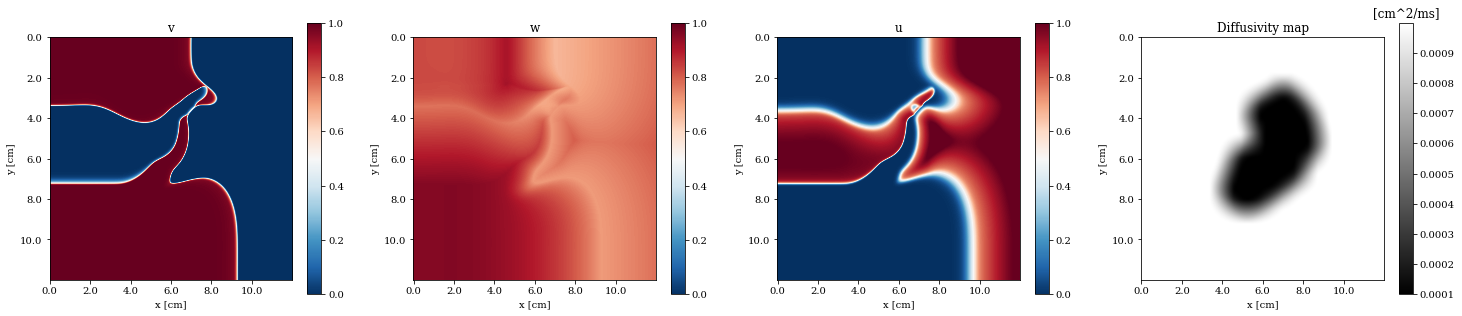

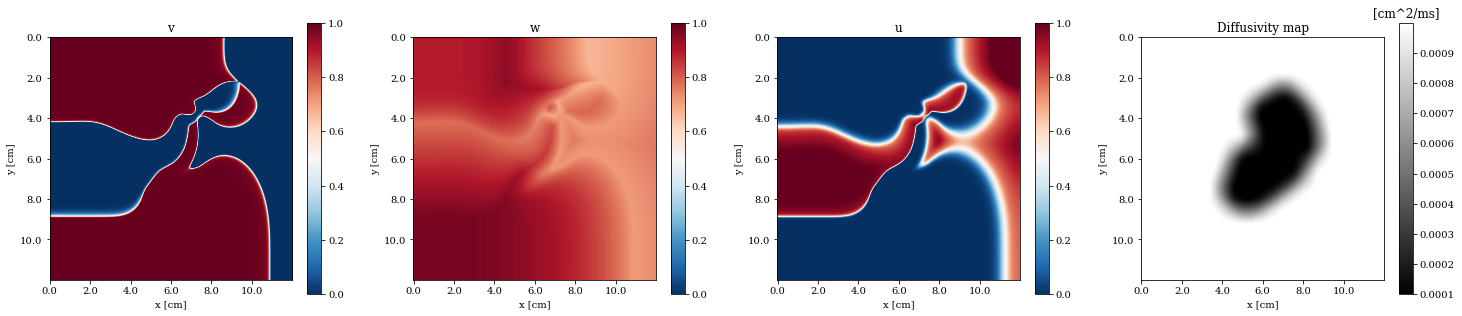

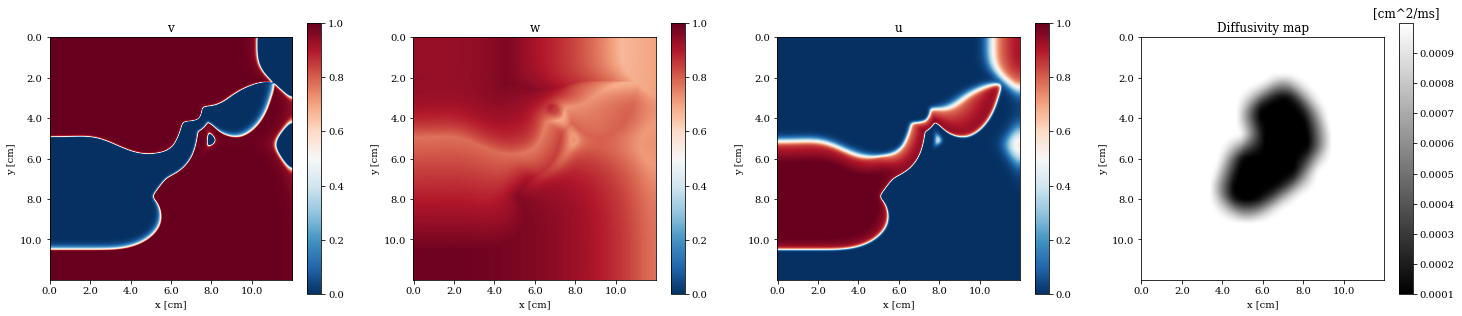

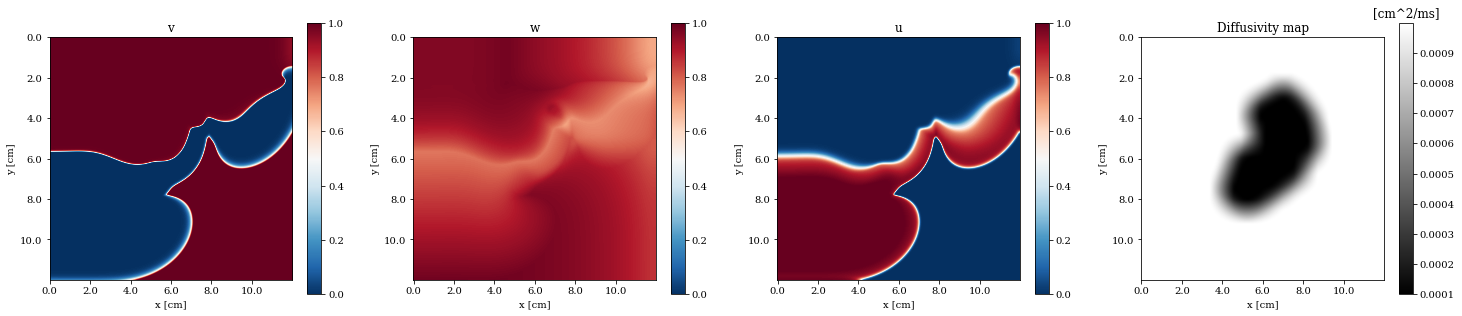

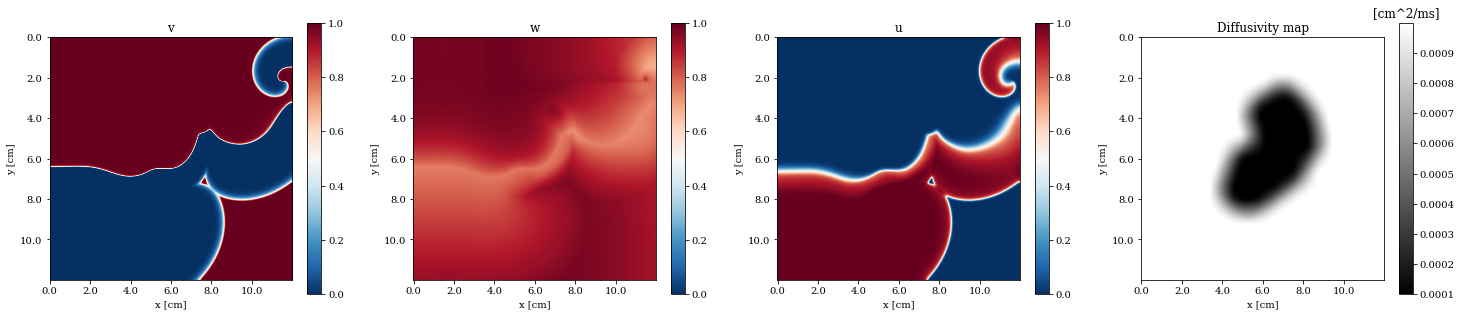

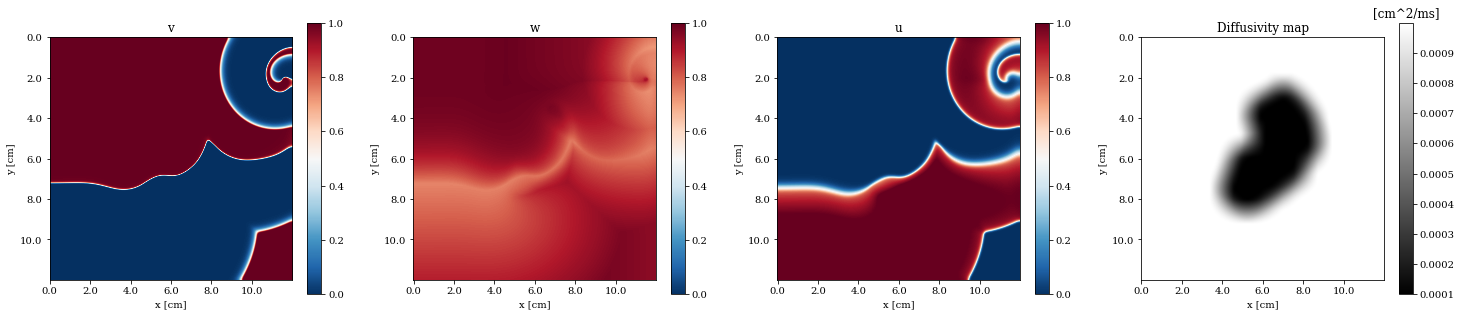

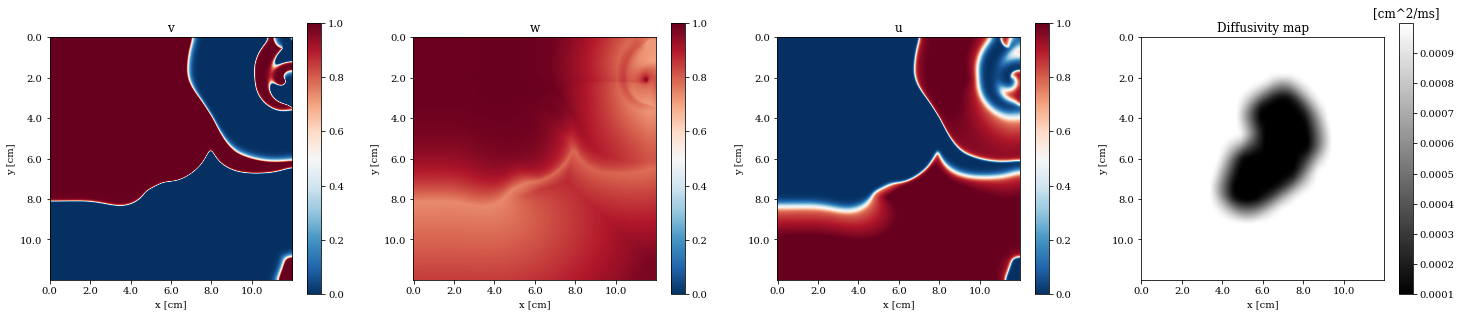

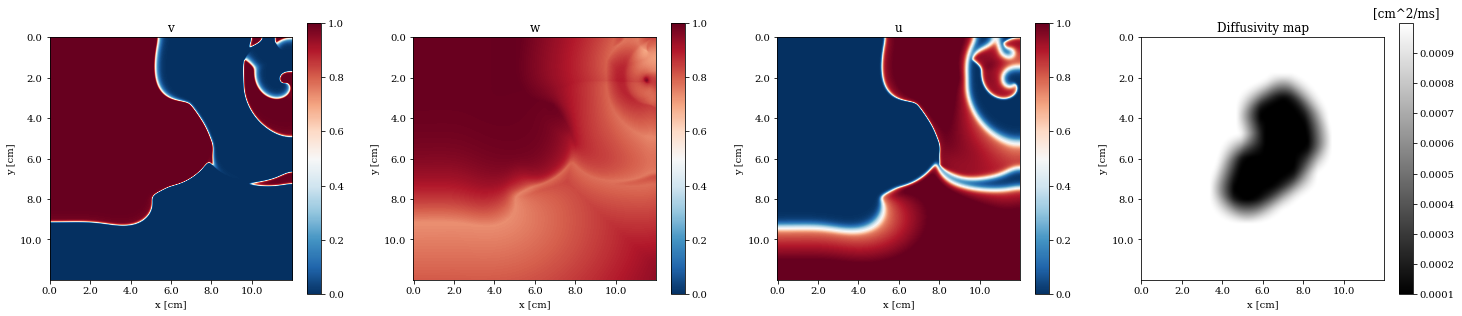

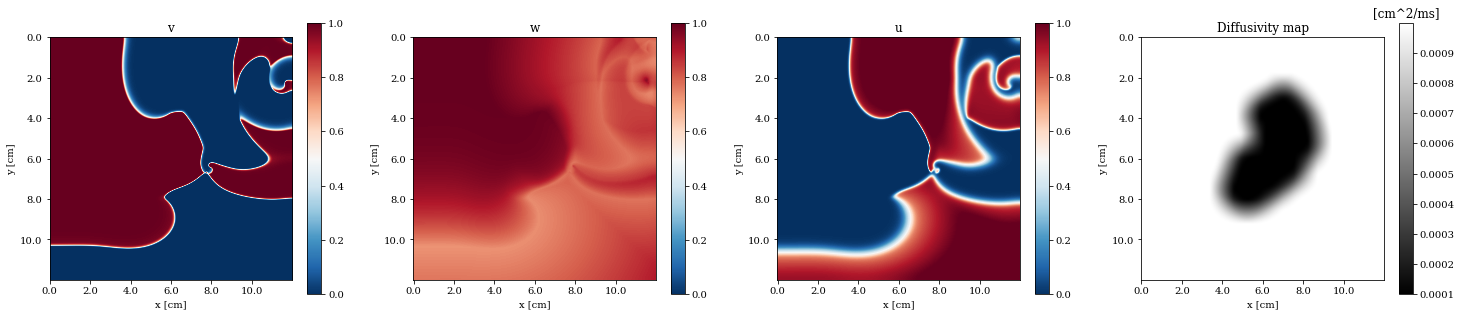

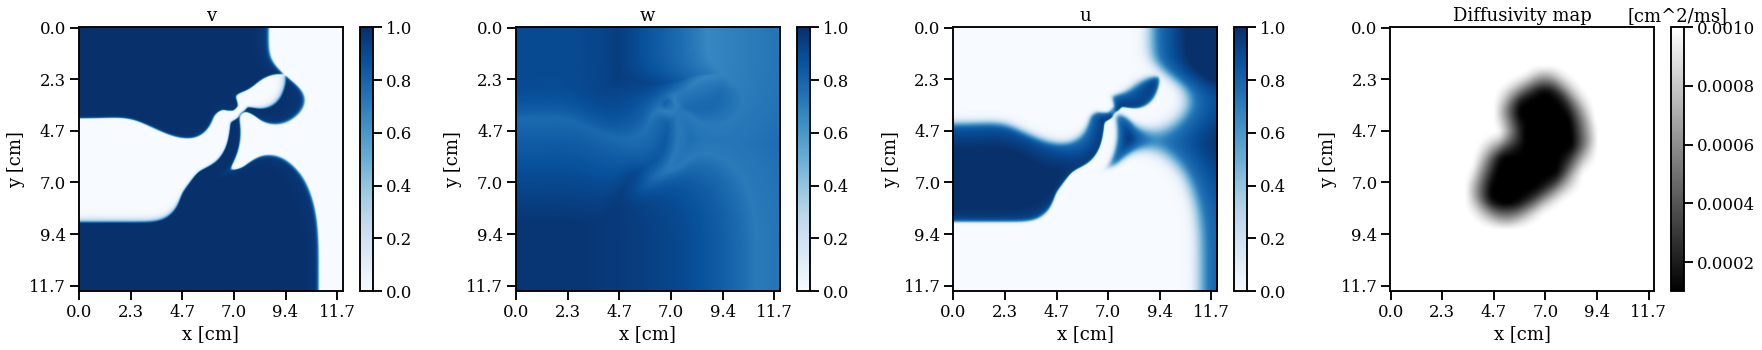

In [4]:
shape = (1200, 1200)
reshape = (256, 256)

state = cardiax.solve.init(shape)
start = 0
step = 5000
dt = 0.01
dx = 0.01
paramset = cardiax.params.PARAMSET_5

p1 = cardiax.stimulus.Protocol(0, 2, 1e9)
s1 = [cardiax.stimulus.linear(shape, cardiax.stimulus.Direction.WEST, 0.2, 20.0, p1)]
p2 = cardiax.stimulus.Protocol(40000, 2, 1e9)
s2 = [cardiax.stimulus.linear(shape, cardiax.stimulus.Direction.NORTH, 0.2, 20.0, p2)]
stimuli = s1 + s2

seed = 1991
rng = jax.random.PRNGKey(seed)
diffusivity = deepx.generate.random_diffusivity(rng, shape)
stop = 100_000
filename = "data/cardiax_{}.hdf5".format(seed)

if not os.path.exists(filename):
    deepx.generate.sequence(
        start, stop, step, dt, dx, paramset, diffusivity, stimuli, filename, reshape=reshape, use_memory=True, plot_while=True
    )

In [7]:
with h5py.File("data/cardiax_{}.hdf5".format(seed), "r") as f:
    states = f["states"]
    d = f["diffusivity"]
    idx = 11
    state = cardiax.solve.State(*states[idx])
    with sns.plotting_context("talk"):
        fig, ax = cardiax.plot.plot_state(state, d, cmap="Blues", dx=12/256, figsize=(25, 5))
        fig.tight_layout()
        os.makedirs("results/cardiax", exist_ok=True)
        fig.savefig("results/cardiax/{}.svg".format(seed))
        fig.savefig("results/cardiax/{}.png".format(seed))

ValueError: Index (11) out of range (0-9)

Tissue size is: (12, 12) - Computing on grid (1200, 1200)
Checkpointing every 5000 steps
Cell parameters Params(tau_v_plus=3.33, tau_v1_minus=12, tau_v2_minus=2, tau_w_plus=1000, tau_w_minus=100, tau_d=0.362, tau_0=5, tau_r=33.33, tau_si=29, k=15, V_csi=0.7, V_c=0.13, V_v=0.04, Cm=1)


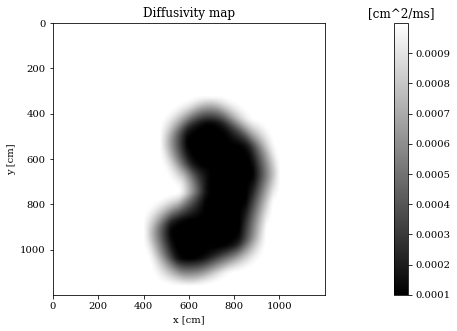

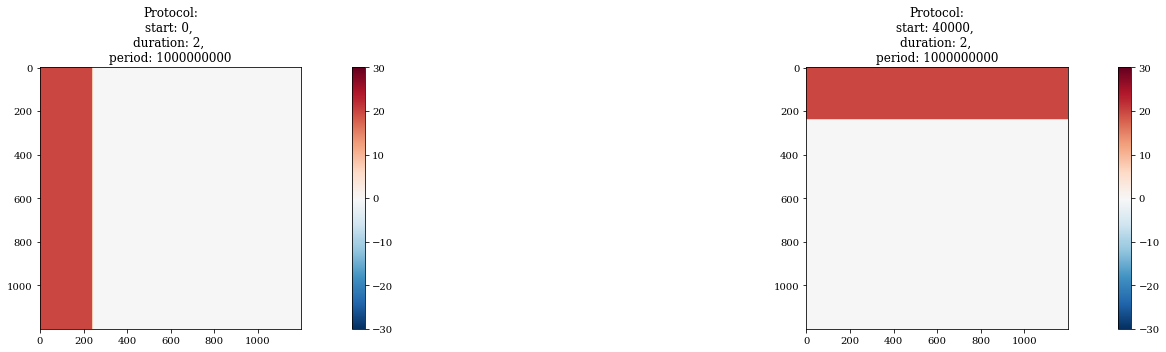

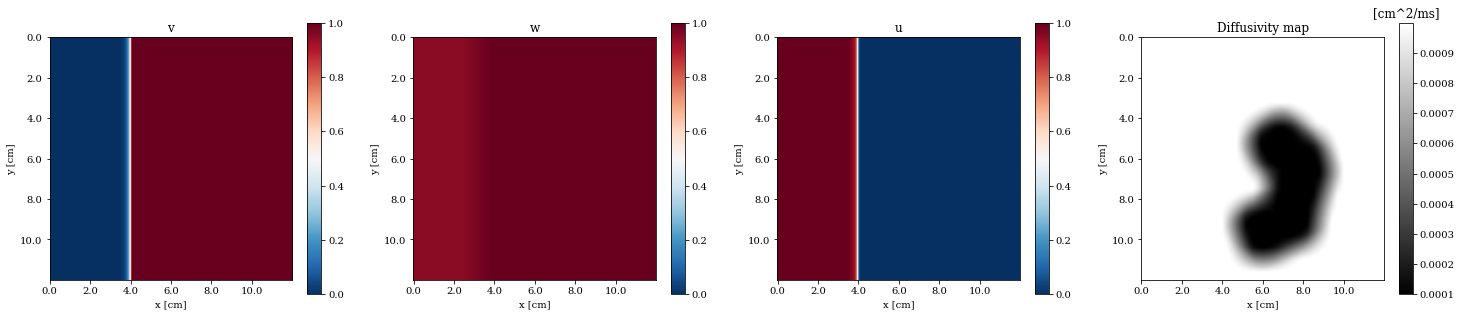

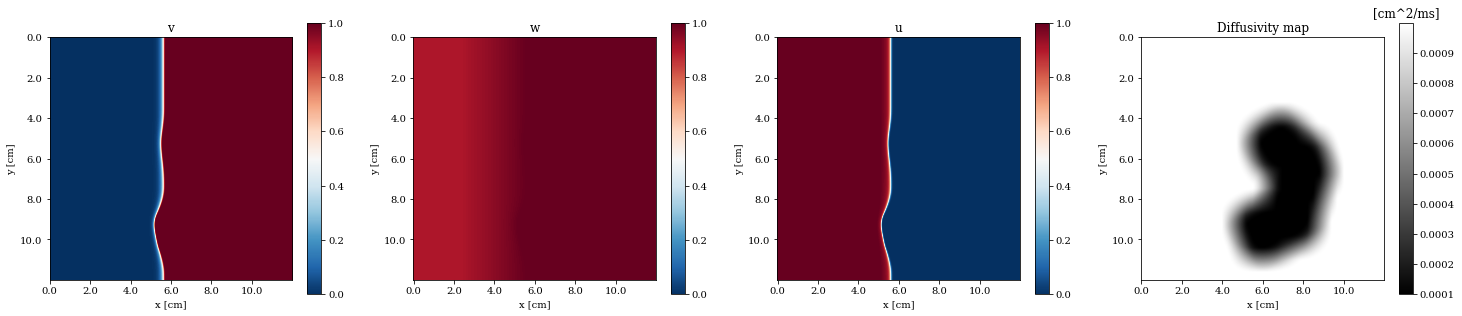

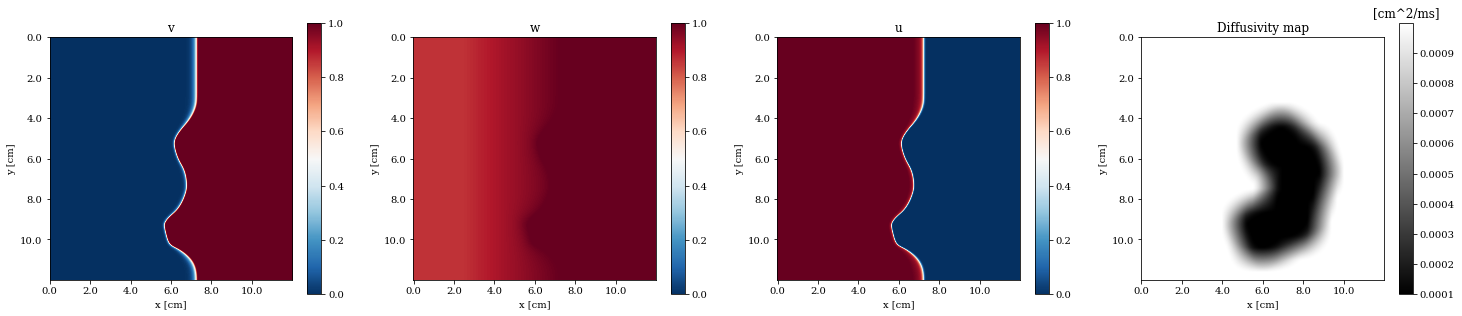

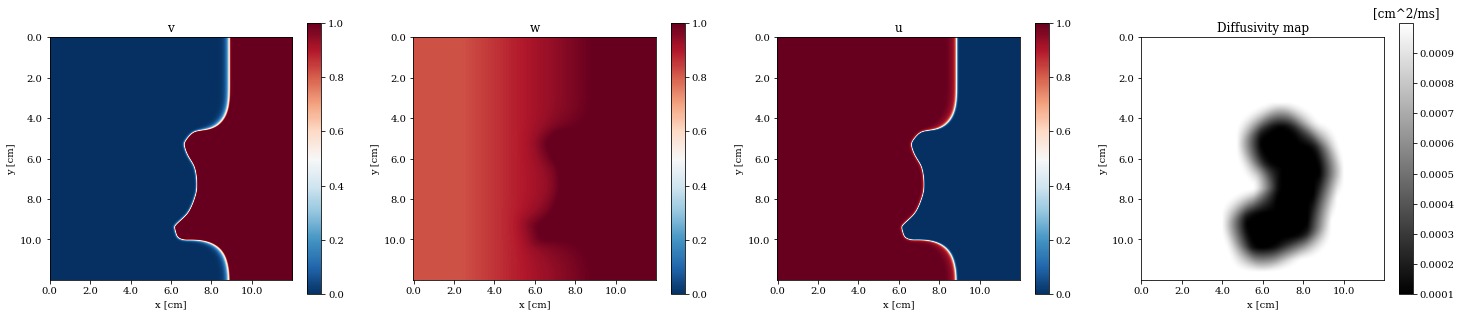

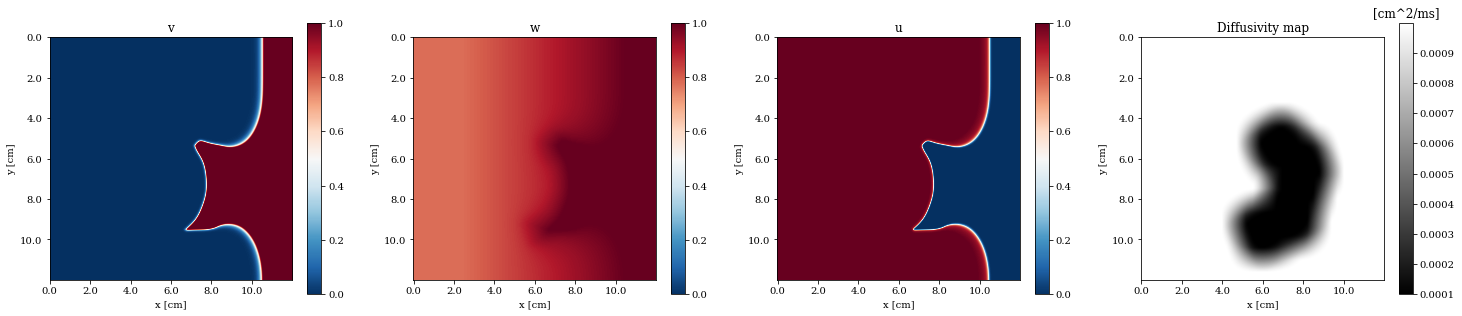

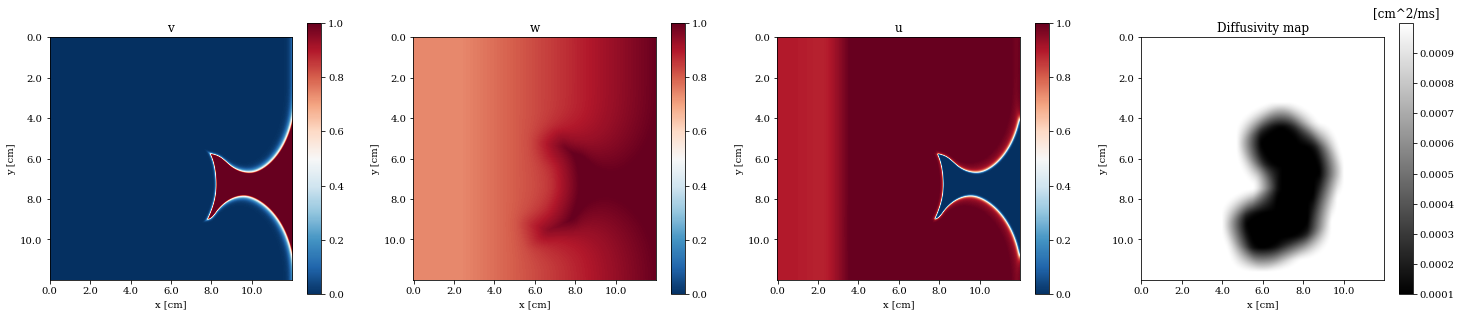

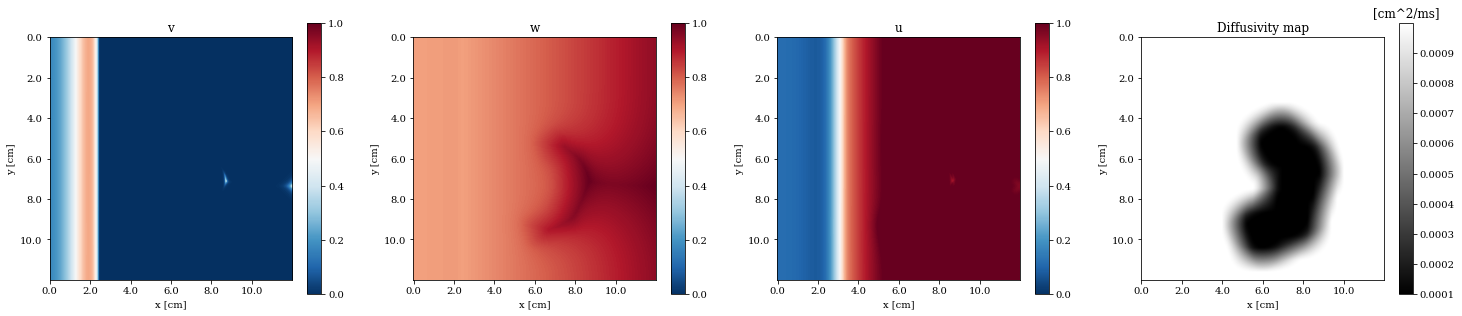

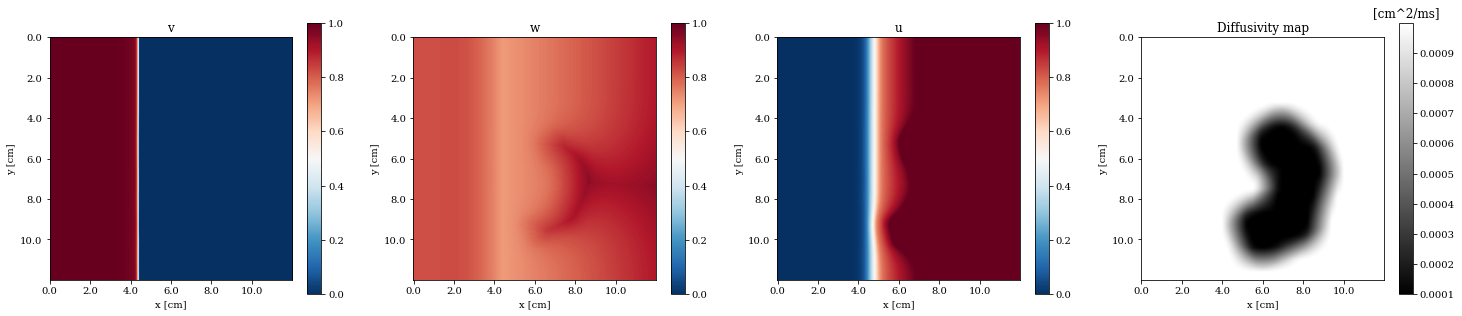

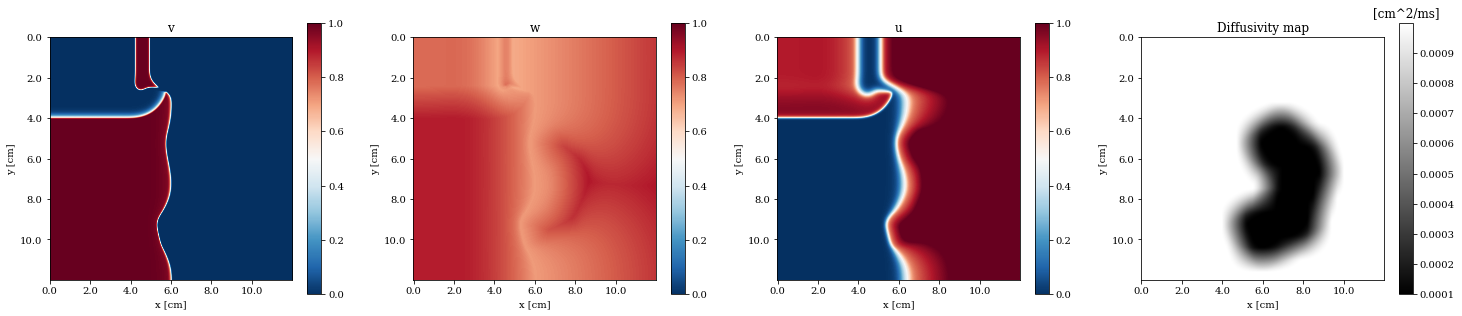

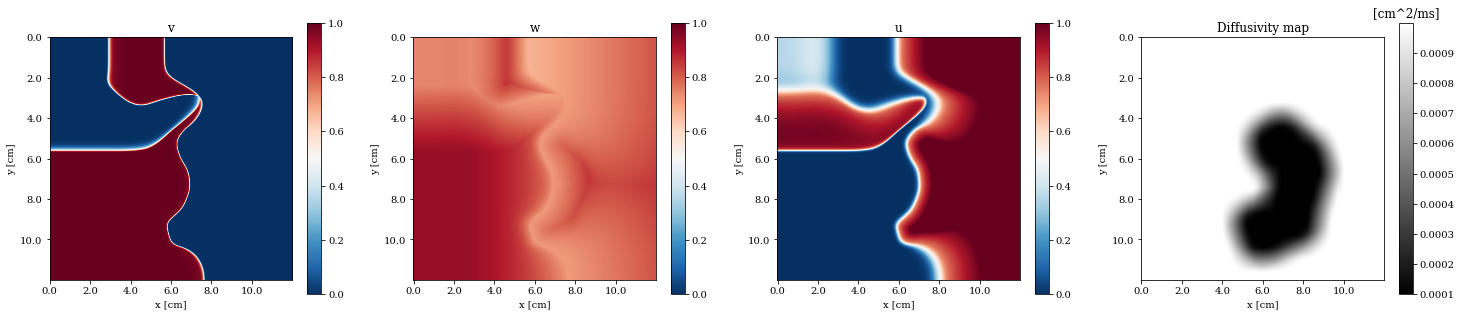

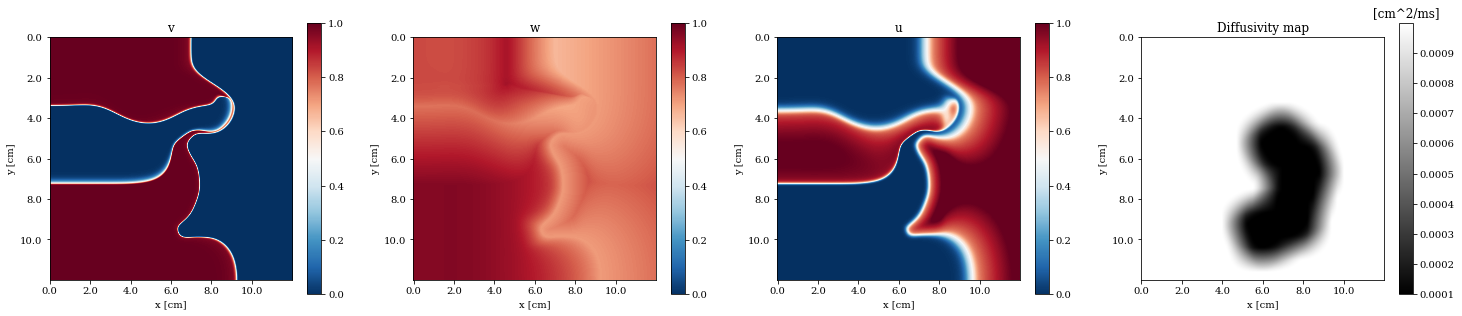

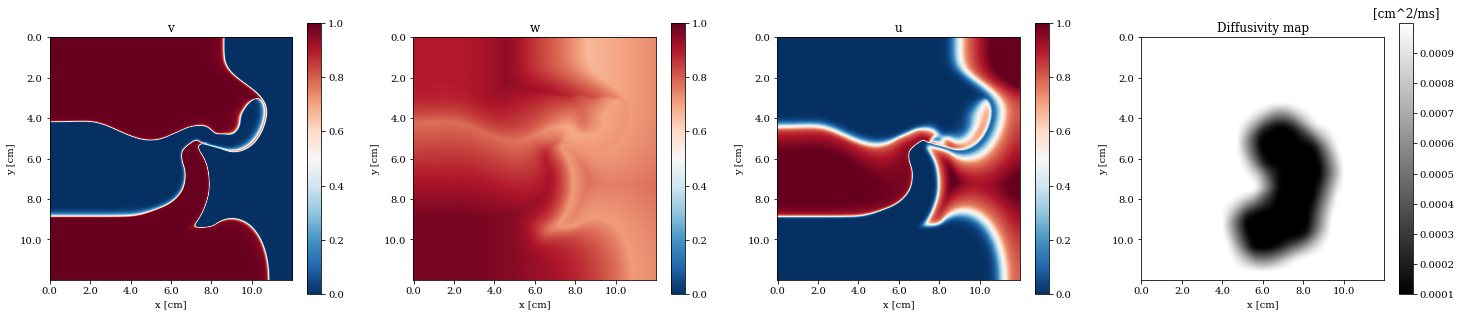

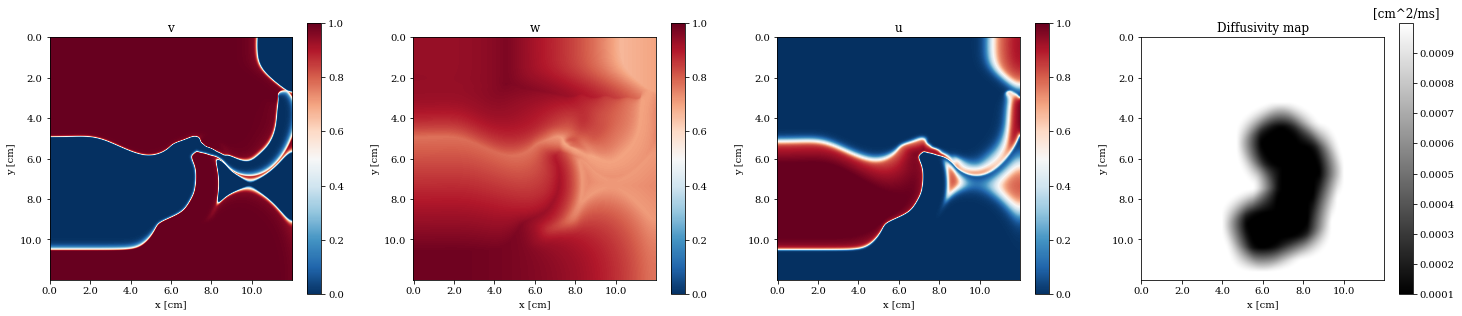

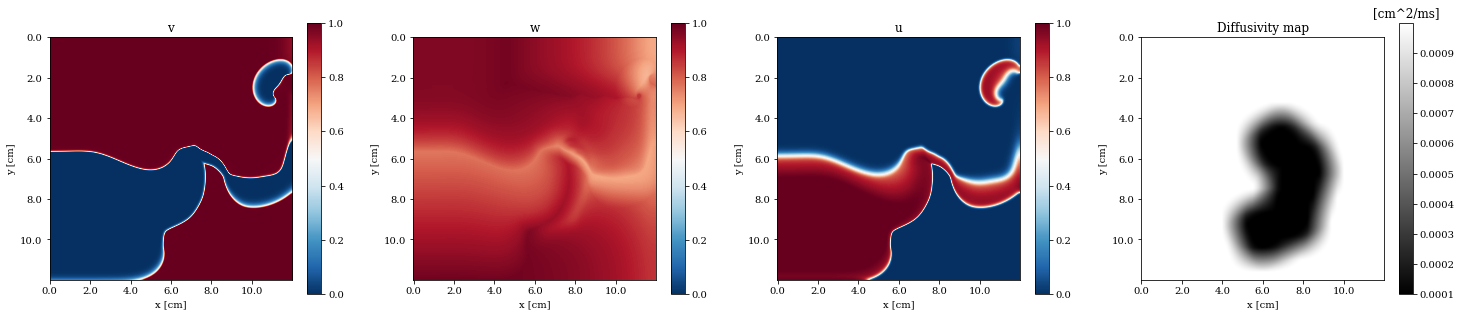

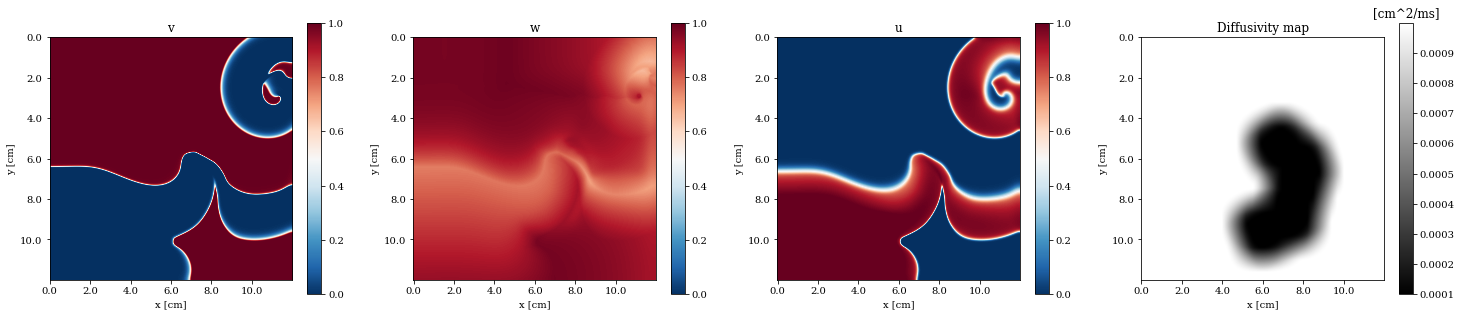

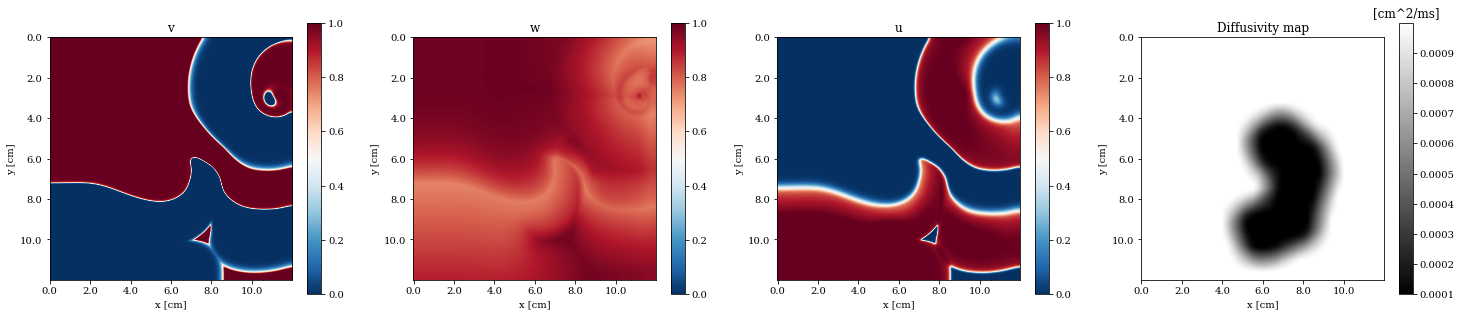

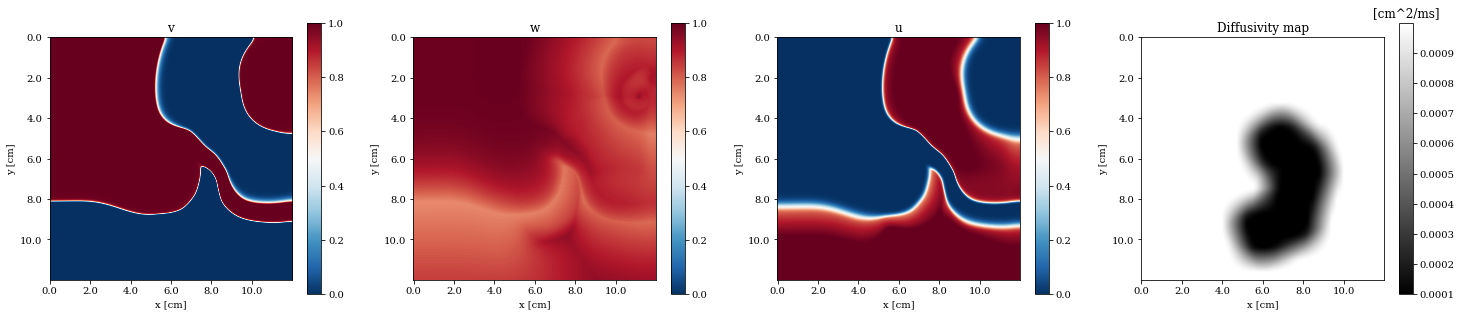

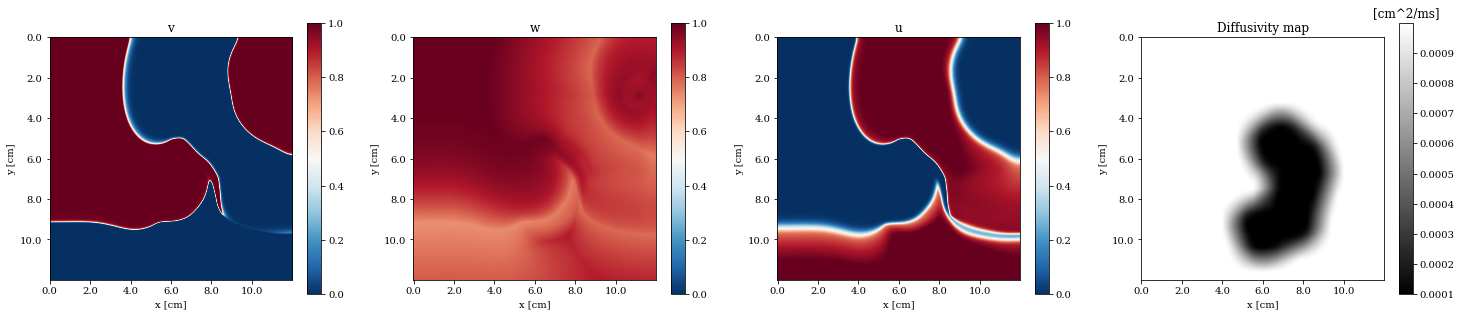

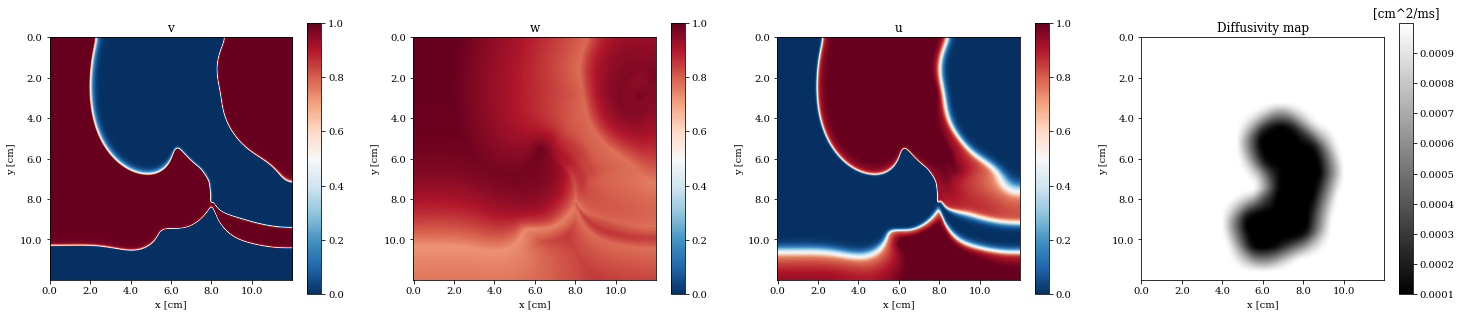

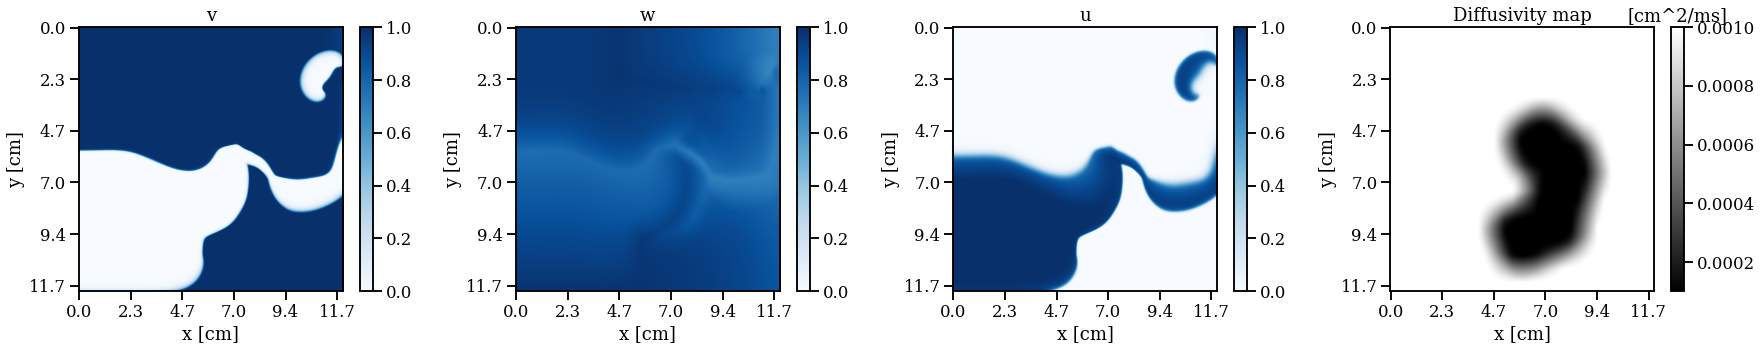

In [5]:
shape = (1200, 1200)
reshape = (256, 256)

state = cardiax.solve.init(shape)
start = 0
step = 5000
dt = 0.01
dx = 0.01
paramset = cardiax.params.PARAMSET_5

p1 = cardiax.stimulus.Protocol(0, 2, 1e9)
s1 = [cardiax.stimulus.linear(shape, cardiax.stimulus.Direction.WEST, 0.2, 20.0, p1)]
p2 = cardiax.stimulus.Protocol(40000, 2, 1e9)
s2 = [cardiax.stimulus.linear(shape, cardiax.stimulus.Direction.NORTH, 0.2, 20.0, p2)]
stimuli = s1 + s2

seed = 1990
rng = jax.random.PRNGKey(seed)
diffusivity = deepx.generate.random_diffusivity(rng, shape)
stop = 100_000
filename = "data/cardiax_{}.hdf5".format(seed)

if not os.path.exists(filename):
    deepx.generate.sequence(
        start, stop, step, dt, dx, paramset, diffusivity, stimuli, filename, reshape=reshape, use_memory=True, plot_while=True
    )

In [ ]:
with h5py.File("data/cardiax_{}.hdf5".format(seed), "r") as f:
    states = f["states"]
    d = f["diffusivity"]
    idx = 13
    state = cardiax.solve.State(*states[idx])
    with sns.plotting_context("talk"):
        fig, ax = cardiax.plot.plot_state(state, d, cmap="Blues", dx=12/256, figsize=(25, 5))
        fig.tight_layout()
        os.makedirs("results/cardiax", exist_ok=True)
        fig.savefig("results/cardiax/{}.svg".format(seed))
        fig.savefig("results/cardiax/{}.png".format(seed))

In [8]:
shape = (1200, 1200)
reshape = (256, 256)

state = cardiax.solve.init(shape)
start = 0
step = 5000
dt = 0.01
dx = 0.01
paramset = cardiax.params.PARAMSET_5

p1 = cardiax.stimulus.Protocol(0, 2, 1e9)
s1 = [cardiax.stimulus.linear(shape, cardiax.stimulus.Direction.WEST, 0.2, 20.0, p1)]
p2 = cardiax.stimulus.Protocol(40000, 2, 1e9)
s2 = [cardiax.stimulus.linear(shape, cardiax.stimulus.Direction.SOUTH, 0.2, 20.0, p2)]
stimuli = s1 + s2

seed = 5
rng = jax.random.PRNGKey(seed)
diffusivity = deepx.generate.random_diffusivity(rng, shape)
stop = 50_000
filename = "data/cardiax_{}.hdf5".format(seed)

if not os.path.exists(filename):
    deepx.generate.sequence(
        start, stop, step, dt, dx, paramset, diffusivity, stimuli, filename, reshape=reshape, use_memory=True, plot_while=True
    )

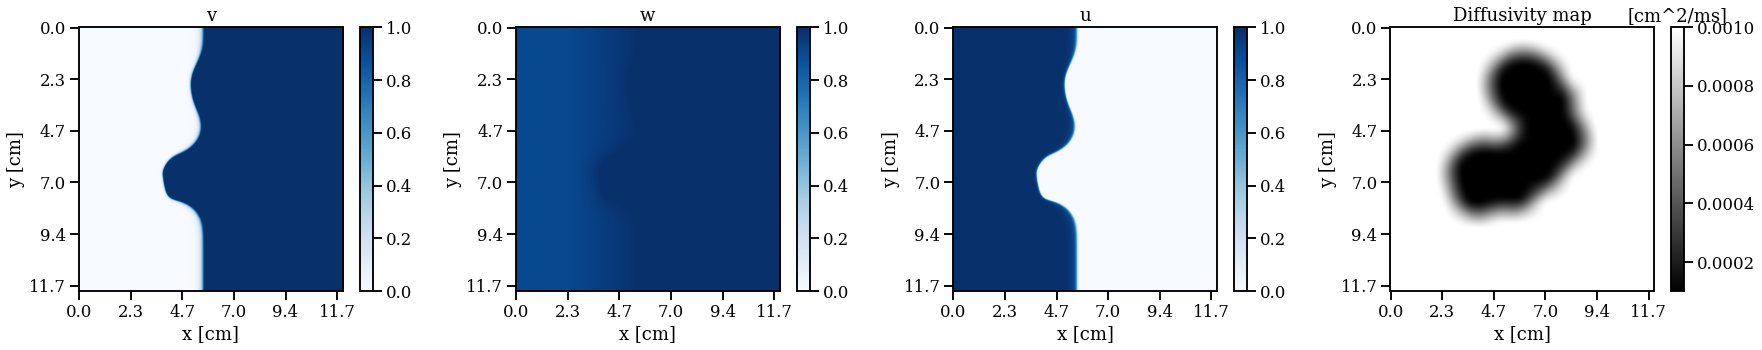

In [9]:
with h5py.File("data/cardiax_{}.hdf5".format(seed), "r") as f:
    states = f["states"]
    d = f["diffusivity"]
    idx = 1
    state = cardiax.solve.State(*states[idx])
    with sns.plotting_context("talk"):
        fig, ax = cardiax.plot.plot_state(state, d, cmap="Blues", dx=12/256, figsize=(25, 5))
        fig.tight_layout()
        os.makedirs("results/cardiax", exist_ok=True)
        fig.savefig("results/cardiax/{}.svg".format(seed))
        fig.savefig("results/cardiax/{}.png".format(seed))